In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [24]:
def get_stationarity(timeseries, key):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Media Móvil')
    std = plt.plot(rolling_std, color='black', label='Desviación Estándar Móvil')
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar Móvil')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[key])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Serie - precio gasolina regular

In [32]:
superior_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
superior_df = superior_df.drop(['tipo_cambio', 'regular', 'diesel', 'bunker', 'cilindro'], axis = 1)

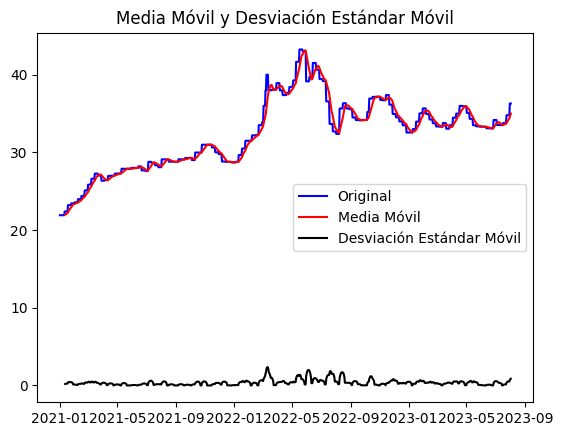

ADF Statistic: -2.35090680623804
p-value: 0.15607446419325105
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [33]:
get_stationarity(superior_df, 'superior')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Gasolina regular

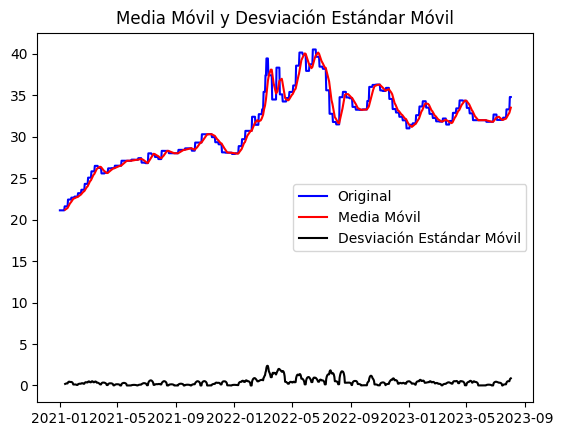

ADF Statistic: -2.211414480259752
p-value: 0.20212877347831437
Critical Values:
	1%: -3.437439232284603
	5%: -2.8646696476686477
	10%: -2.5684364181154127


In [35]:
regular_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
regular_df = regular_df.drop(['tipo_cambio', 'superior', 'diesel', 'bunker', 'cilindro'], axis = 1)
get_stationarity(regular_df, 'regular')


El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Diesel

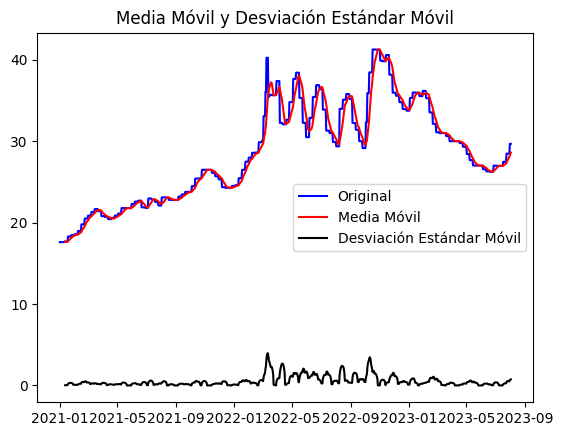

ADF Statistic: -1.966137082928931
p-value: 0.3016152633723686
Critical Values:
	1%: -3.437462363899248
	5%: -2.8646798473884134
	10%: -2.568441851017076


In [36]:
diesel_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
diesel_df = diesel_df.drop(['tipo_cambio', 'superior', 'regular', 'bunker', 'cilindro'], axis = 1)
get_stationarity(diesel_df, 'diesel')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Bunker

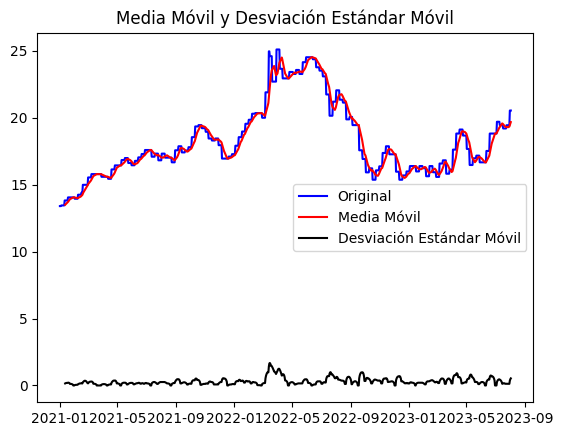

ADF Statistic: -1.990639766950217
p-value: 0.29069225613028904
Critical Values:
	1%: -3.437423894618058
	5%: -2.864662884591462
	10%: -2.5684328157550835


In [37]:
bunker_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
bunker_df = bunker_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'cilindro'], axis = 1)
get_stationarity(bunker_df, 'bunker')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio cilindro de gas

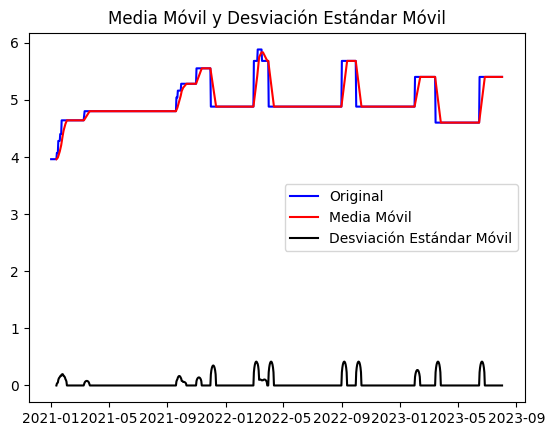

ADF Statistic: -3.8371785733492363
p-value: 0.0025490315503667793
Critical Values:
	1%: -3.437303541847512
	5%: -2.864609814371715
	10%: -2.5684045480287296


In [40]:
cilindro_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
cilindro_df = cilindro_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'bunker'], axis = 1)
get_stationarity(cilindro_df, 'cilindro')

# Modelos utilizando las series

## Modelo para precios de gasolina superior
- Inicio: 2021-01-01
- Fin: 2023-08-02
- Frecuencia: Diaria

### Descomponiendo el modelo
En los siguientes gráficos se demuestra cierta tendencia en el aumento de precios, por lo que deberemos de realizar transofrmaciones en la serie.

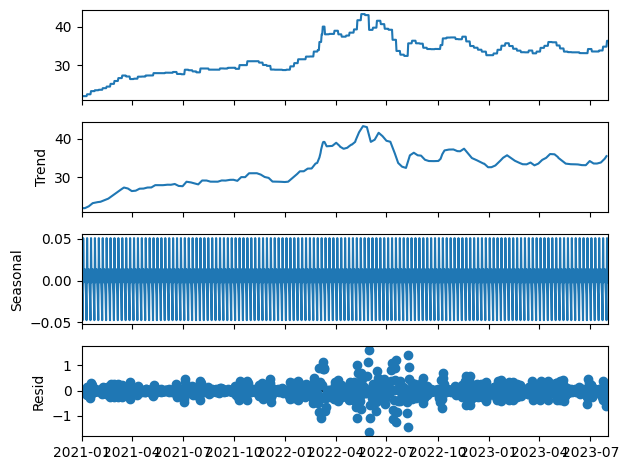

<Figure size 2000x600 with 0 Axes>

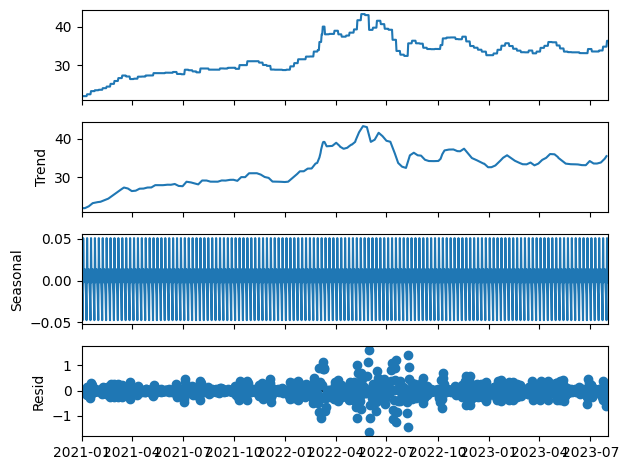

In [45]:

descomposicion = seasonal_decompose(superior_df)
plt.figure(figsize=(20,6))
descomposicion.plot()

### Estimando parametros

Estacionar la varianza

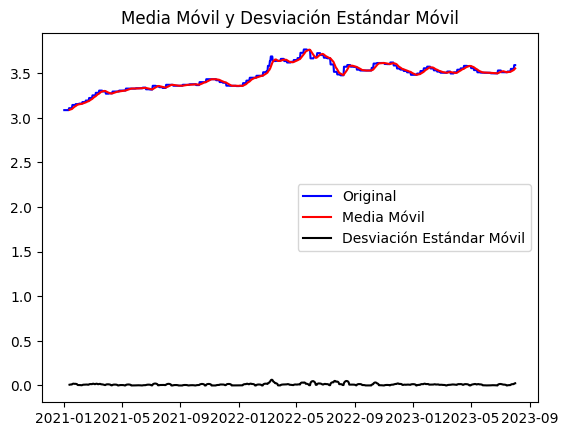

ADF Statistic: -2.5839569036364476
p-value: 0.09635858974064004
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [47]:
superior_df_log = np.log(superior_df)
get_stationarity(superior_df_log, 'superior')

Estacionar la media

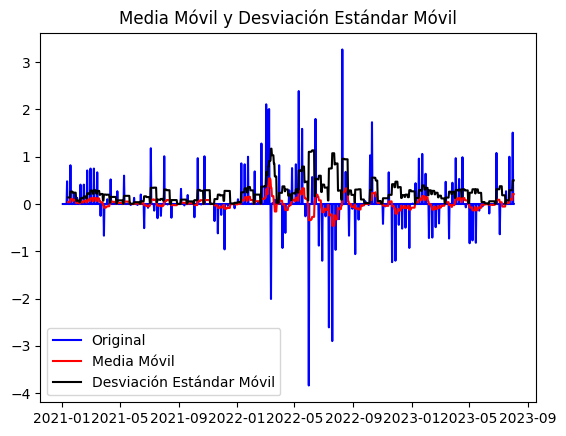

ADF Statistic: -8.572824810187873
p-value: 8.110674855908602e-14
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [49]:
superior_df_diff = superior_df.diff()
superior_df_diff.dropna(inplace=True)
get_stationarity(superior_df_diff, 'superior')

Obteniendo valores (p, d, q):
- p: ACF 
- d: 1
- q: 

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7